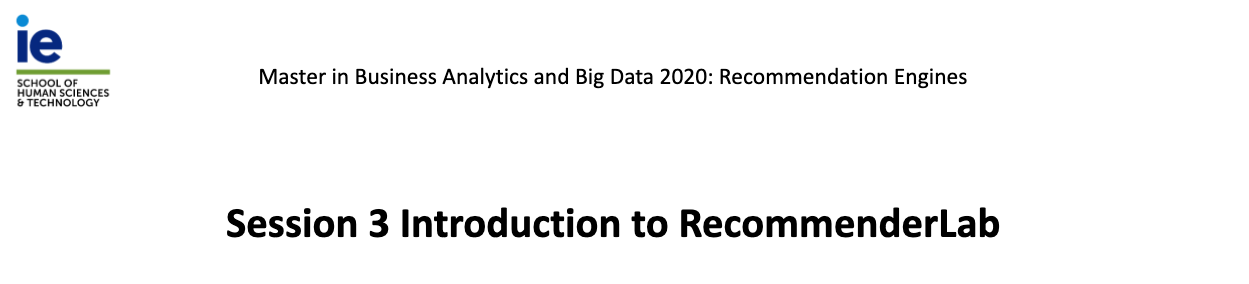


# Introduction

Please make sure that you are connected to a hosted Google Colab environment. If that's the case, at the upper right part of your screen you should see a green check mark like this one 

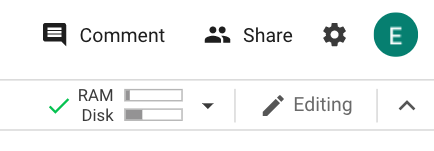

If you are not connected, please click on Connect button 

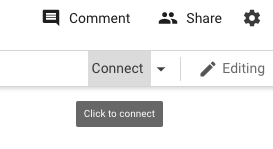



After that please, execute cells below to install required libraries, it will take a couple of minutes. 

In [ ]:
install.packages(c('dplyr','ggplot2','knitr','recommenderlab'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppProgress’, ‘arules’, ‘proxy’, ‘registry’, ‘irlba’, ‘recosystem’




In [ ]:
library(dplyr)
library(ggplot2)
library(knitr)
library(recommenderlab)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loading required package: arules


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required package: registry

Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



# Data preparation

The 100k MovieLense ratings data set. The data was collected through the [MovieLens web site](http://movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998. The research group in charge, GroupLens, also made available a richer data set, containing millions of recommendation, [check available data sets](https://grouplens.org/datasets/movielens/). The data set provided within recommenderlab package, contains about 100,000 ratings (1-5) from 943 users on 1664 movies. Movie metadata is also provided in MovieLenseMeta.

The format of MovieLense is an object of class ``realRatingMatrix``

The format of MovieLenseMeta is a data.frame with movie title, year, IMDb URL and indicator variables for 19 genres.



## MovieLense dataset

Each **row of MovieLense corresponds to a user**, and each **column corresponds to a movie**. There are more than 943 x 1664 = 1,500,000 combinations between a user and a movie. 

This dataset is included within `recommenderlab` package [MovieLense documentation](https://rdrr.io/cran/recommenderlab/man/MovieLense.html). 

In [ ]:
data(MovieLense)
MovieLense

943 x 1664 rating matrix of class ‘realRatingMatrix’ with 99392 ratings.

In [ ]:
head(MovieLenseMeta)

,title,year,url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,⋯,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Toy Story (1995),1995,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995),0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Rating representation

As we saw previously each pair user-movie rating is stored using a matrix and represents the rating given by $\text{user}_i$ to $\text{movie}_j$  
- rows (index $i$) represent users 
- columns (index $j$) represent moviese

In [ ]:
# select rows (users) from 1 to 3, and columns (movies) from 1 to 5
as (MovieLense[c(1:3),c(1:5)], "matrix")

,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995)
1,5,3,4,3,3
2,4,NA,NA,NA,NA
3,NA,NA,NA,NA,NA


In [ ]:
# select rows (users) from 1 to 10, and columns (movies) from 1 to 10
as (MovieLense[c(1:10),c(1:10)],"matrix")

,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995)
1,5,3,4,3,3,5,4,1,5,3
2,4,NA,NA,NA,NA,NA,NA,NA,NA,2
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,4,3,NA,NA,NA,NA,NA,NA,NA,NA
6,4,NA,NA,NA,NA,NA,2,4,4,NA
7,NA,NA,NA,5,NA,NA,5,5,5,4
8,NA,NA,NA,NA,NA,NA,3,NA,NA,NA
9,NA,NA,NA,NA,NA,5,4,NA,NA,NA
10,4,NA,NA,4,NA,NA,4,NA,4,NA


The object ``MovieLense`` is an instance of the class ``realRatingMatix``


## **Exercise**

Write a code that converts the MovieLense into a R matrix, but selecting only from user 10 to 30 and movies from 20 to 30.

In [ ]:
## insert your code here
as (MovieLense[c(10:30),c(20:30)],"matrix")

,Angels and Insects (1995),Muppet Treasure Island (1996),Braveheart (1995),Taxi Driver (1976),Rumble in the Bronx (1995),"Birdcage, The (1996)","Brothers McMullen, The (1995)",Bad Boys (1995),Apollo 13 (1995),Batman Forever (1995),Belle de jour (1967)
10,NA,NA,5,5,NA,NA,NA,NA,NA,NA,NA
11,NA,NA,4,NA,3,3,NA,NA,5,3,NA
12,NA,NA,NA,NA,NA,NA,NA,NA,5,NA,NA
13,NA,3,4,5,1,1,NA,3,5,2,NA
14,NA,NA,3,5,NA,2,NA,NA,NA,NA,NA
15,3,NA,NA,NA,NA,3,NA,NA,NA,NA,NA
16,NA,NA,5,NA,NA,NA,NA,2,5,NA,NA
17,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,NA,NA,5,4,NA,3,4,NA,3,NA,NA
19,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# The class realRatingMatrix 
The realRatingMatrix class is defined by ``recommenderlab`` in this class are defined a set of utility methods that can be use to manipulate realRatingMatrix

- ``dim()``method return the size of the matrix
- ``colSums()`` method return the sum of each column (movie)
- ``rowCounts()``  method that return the number of ratings per row (user)


Check realRatingMatrix [documentation](https://www.rdocumentation.org/packages/recommenderlab/versions/0.2-6/topics/ratingMatrix)



In [ ]:
class(MovieLense)

[1] "realRatingMatrix"
attr(,"package")
[1] "recommenderlab"

In [ ]:
methods(class = class(MovieLense))

 [1] [                      [<-                    binarize              
 [4] calcPredictionAccuracy coerce                 colCounts             
 [7] colMeans               colSds                 colSums               
[10] denormalize            dim                    dimnames              
[13] dimnames<-             dissimilarity          evaluationScheme      
[16] getData.frame          getList                getNormalize          
[19] getRatingMatrix        getRatings             getTopNLists          
[22] hasRating              image                  normalize             
[25] nratings               Recommender            removeKnownRatings    
[28] rowCounts              rowMeans               rowSds                
[31] rowSums                sample                 show                  
[34] similarity            
see '?methods' for accessing help and source code

In [ ]:
dim(MovieLense)

[1]  943 1664

Previous result indicates that there are **943 users and 1664 movies**



In [ ]:
rowCounts(MovieLense)

## Matrix sparsity 

Storing the complete matrix would require more than 1,500,000 cells. However, not every user has watched every movie. Therefore, there are fewer than 100,000 ratings, and the matrix is sparse. The recommenderlab package allows us to store it in a compact way.

Usually, rating matrices are sparse matrices. For this reason, the realRatingMatrix class supports a compact storage of sparse matrices. Let's compare the size of MovieLense with the corresponding R matrix.

In [ ]:
object.size(MovieLense)

1409432 bytes

In [ ]:
object.size(as (MovieLense,"matrix"))

12761360 bytes

In [ ]:
12761360/1409432

[1] 9.054257

As expected, MovieLense occupies much less space than the equivalent standard R matrix. The rate is about 1:9, and the reason is the sparsity of MovieLense. A
standard R matrix object stores all the missing values as 0s, so it stores 9 times more cells.

Since realRatingMatrix is an S4 class , the components of the objects are contained in MovieLense slots. We can see all the slots
using slotNames, which displays all the data stored within an object:

In [ ]:
slotNames(MovieLense)

[1] "data"      "normalize"

MovieLense contains a data slot. Let's take a look at it.

In [ ]:
MovieLense@data[1:10,1:5]

10 x 5 sparse Matrix of class "dgCMatrix"
   Toy Story (1995) GoldenEye (1995) Four Rooms (1995) Get Shorty (1995)
1                 5                3                 4                 3
2                 4                .                 .                 .
3                 .                .                 .                 .
4                 .                .                 .                 .
5                 4                3                 .                 .
6                 4                .                 .                 .
7                 .                .                 .                 5
8                 .                .                 .                 .
9                 .                .                 .                 .
10                4                .                 .                 4
   Copycat (1995)
1               3
2               .
3               .
4               .
5               .
6               .
7               .
8          

## Exercise
Plaase write a code to get from MovieLense data slot, selecting from user 100 to 105 and movies from 50 to 55

In [ ]:
## insert your code here
MovieLense@data[100:105,50:55]

6 x 6 sparse Matrix of class "dgCMatrix"
    Star Wars (1977) Legends of the Fall (1994)
100                .                          .
101                4                          .
102                4                          .
103                5                          .
104                5                          .
105                .                          .
    Madness of King George, The (1994) Natural Born Killers (1994)
100                                  .                           .
101                                  .                           .
102                                  .                           2
103                                  .                           .
104                                  .                           .
105                                  .                           .
    Outbreak (1995) Professional, The (1994)
100               .                        .
101               .                        .
102               .

## Exercise
Do the same, select from user 100 to 105 and movies from 50 to 55 ratings, but instead of using MovieLense data slot, **use the method ``getRatingMatrix(MovieLense)``[$i_{init}:i_{end}$, $j_{init}:j_{end}$]** specify user and movie indexes. 

In [ ]:
## insert your code here
getRatingMatrix(MovieLense)[100:105,50:55]

6 x 6 sparse Matrix of class "dgCMatrix"
    Star Wars (1977) Legends of the Fall (1994)
100                .                          .
101                4                          .
102                4                          .
103                5                          .
104                5                          .
105                .                          .
    Madness of King George, The (1994) Natural Born Killers (1994)
100                                  .                           .
101                                  .                           .
102                                  .                           2
103                                  .                           .
104                                  .                           .
105                                  .                           .
    Outbreak (1995) Professional, The (1994)
100               .                        .
101               .                        .
102               .

# Exploratory data analysis (EDA)



## Exploring values of ratings
Starting from the slot data, we can explore the matrix. Let's take a look at the ratings variable.

In [ ]:
ratings <- getRatingMatrix(MovieLense)

We can convert the matrix into a vector and explore its values

In [ ]:
ratings[1:10,1:20]

   [[ suppressing 20 column names ‘Toy Story (1995)’, ‘GoldenEye (1995)’, ‘Four Rooms (1995)’ ... ]]



10 x 20 sparse Matrix of class "dgCMatrix"
                                          
1  5 3 4 3 3 5 4 1 5 3 2 5 5 5 5 5 3 4 5 4
2  4 . . . . . . . . 2 . . 4 4 . . . . 3 .
3  . . . . . . . . . . . . . . . . . . . .
4  . . . . . . . . . . 4 . . . . . . . . .
5  4 3 . . . . . . . . . . . . . . 4 . . .
6  4 . . . . . 2 4 4 . . 4 2 5 3 . . . 4 .
7  . . . 5 . . 5 5 5 4 3 5 . . . . . . . .
8  . . . . . . 3 . . . 3 . . . . . . . . .
9  . . . . . 5 4 . . . . . . . . . . . . .
10 4 . . 4 . . 4 . 4 . 4 5 3 . . 4 . . . .

In [ ]:
vector_ratings <- as.vector(MovieLense@data)
unique(vector_ratings)


[1] 5 4 0 3 1 2


The ratings are integers in the range 0-5. Let's count the occurrences of each of them.

In [ ]:
table_ratings <- table(vector_ratings)
table_ratings

vector_ratings
      0       1       2       3       4       5 
1469760    6059   11307   27002   33947   21077 



Now, we can build a frequency plot of the ratings. In order to visualize a bar plot with frequencies, we can use ggplot2. Let's convert them into categories using factor and build a quick chart:

In [ ]:
factor_vector_ratings <- factor(vector_ratings)

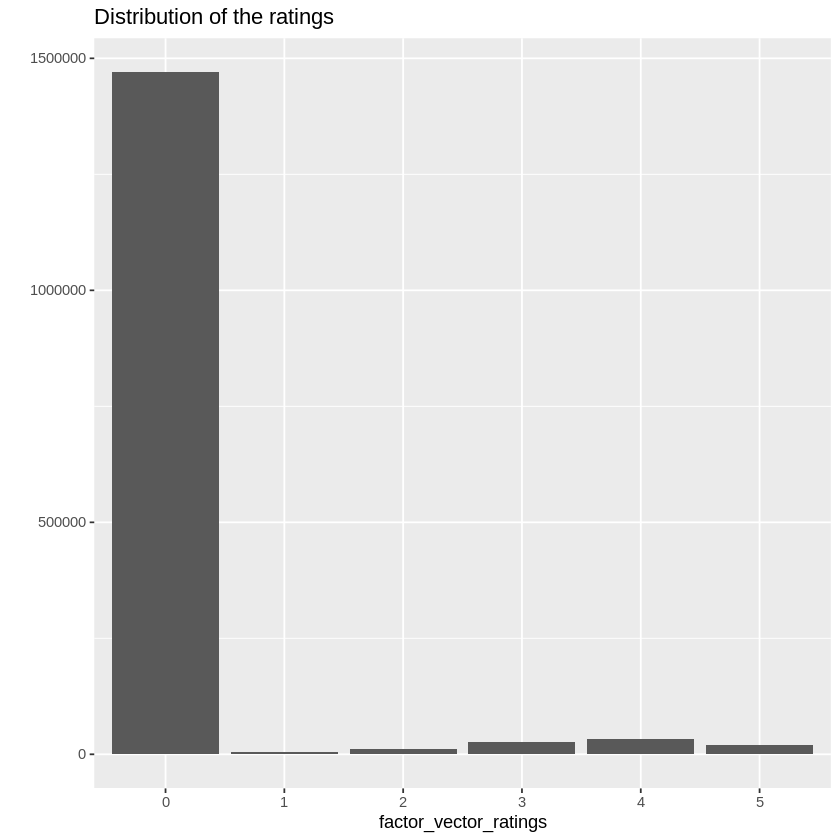

In [ ]:
qplot(factor_vector_ratings) + ggtitle("Distribution of the ratings")

The previous plots is dominated by huge number of 0's values, according to the documentation, a rating equal to 0 represents a missing value, so can you remove them from vector_ratings and make the plot again?

###Exercise 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



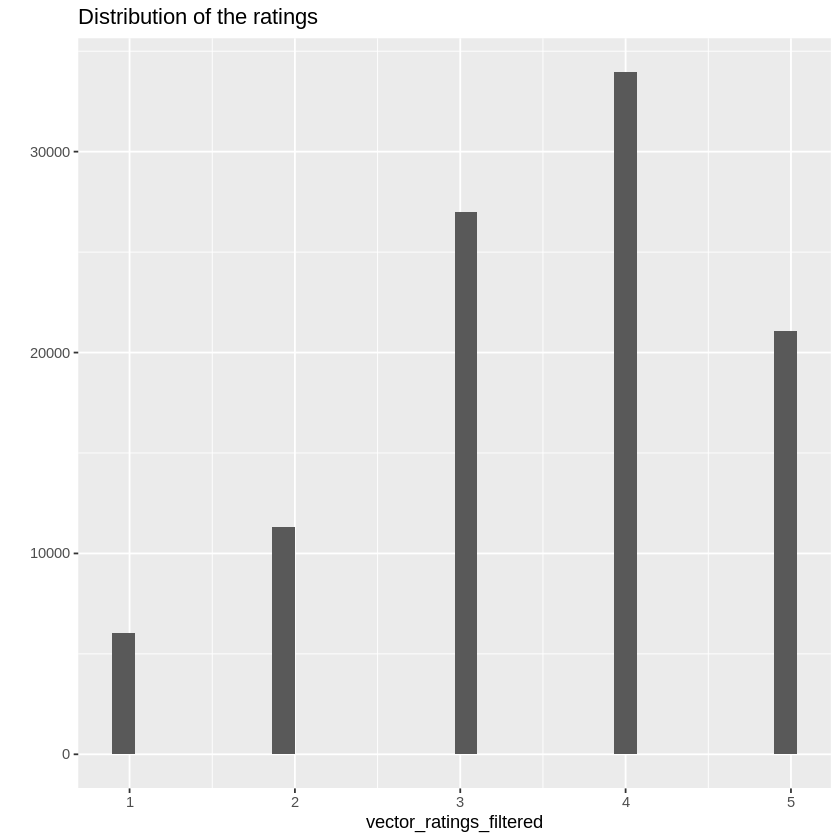

In [ ]:
#create a vector_ratings_filtered variable filtering out 0's values from vector_ratings variable
# insert your code here
vector_ratings_filtered <- vector_ratings[vector_ratings != 0]
qplot(vector_ratings_filtered) + ggtitle("Distribution of the ratings")

## Exploring rated movies

Starting with MovieLense, we can easily extract quick results using methods such as the following ones:
-  colCounts: This is the number of non-missing values for each column
- colMeans: This is the average value for each column

For instance, which are the most viewed movies? We can use colCounts for this
purpose. First, let's count the views for each movie:


```
views_per_movie <- colCounts(MovieLense)
```


In [ ]:
views_per_movie <- colCounts(MovieLense)


Then, we can sort the movies by number of views:


```
table_views <- data.frame(
movie = names(views_per_movie),
views = views_per_movie
)
table_views <- table_views[order(table_views$views, decreasing =TRUE), ]
```



In [ ]:
table_views <- data.frame( 
movie = names(views_per_movie),
views = views_per_movie
)
table_views <- table_views[order(table_views$views, decreasing =TRUE),]

In [ ]:
head(table_views,10)

,movie,views
,<chr>,<int>
Star Wars (1977),Star Wars (1977),583
Contact (1997),Contact (1997),509
Fargo (1996),Fargo (1996),508
Return of the Jedi (1983),Return of the Jedi (1983),507
Liar Liar (1997),Liar Liar (1997),485
"English Patient, The (1996)","English Patient, The (1996)",481
Scream (1996),Scream (1996),478
Toy Story (1995),Toy Story (1995),452
Air Force One (1997),Air Force One (1997),431


In [ ]:
tail(table_views)

,movie,views
,<chr>,<int>
"War at Home, The (1996)","War at Home, The (1996)",1
Sweet Nothing (1995),Sweet Nothing (1995),1
Mat' i syn (1997),Mat' i syn (1997),1
B. Monkey (1998),B. Monkey (1998),1
You So Crazy (1994),You So Crazy (1994),1
Scream of Stone (Schrei aus Stein) (1991),Scream of Stone (Schrei aus Stein) (1991),1


Let's filter movies with more than ``150 views``

In [ ]:
filter(table_views, views > 150)

,movie,views
,<chr>,<int>
Star Wars (1977),Star Wars (1977),583
Contact (1997),Contact (1997),509
Fargo (1996),Fargo (1996),508
Return of the Jedi (1983),Return of the Jedi (1983),507
Liar Liar (1997),Liar Liar (1997),485
"English Patient, The (1996)","English Patient, The (1996)",481
Scream (1996),Scream (1996),478
Toy Story (1995),Toy Story (1995),452
Air Force One (1997),Air Force One (1997),431


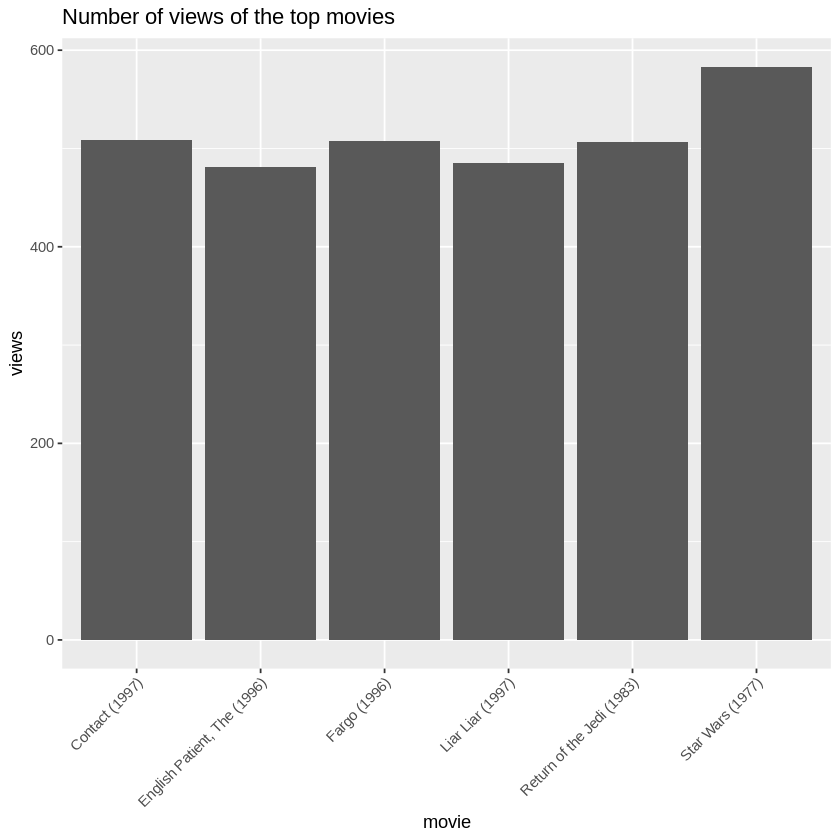

In [ ]:
plot<-ggplot(table_views[1:6, ], aes(x = movie, y = views)) +
geom_bar(stat="identity") + theme(axis.text.x =
element_text(angle = 45, hjust = 1)) + ggtitle("Number of views of the top movies")
plot

In [ ]:
#save above graph
ggsave(filename="most_watched_movies.jpg", plot=plot)

Saving 6.67 x 6.67 in image



### Exercise
 In previous code we've created an histogram for the top-6 most watched movies, please modify the code below and create an histogram for top-20 most watched movies

```
plot<-ggplot(table_views[1:6, ], aes(x = movie, y = views)) +
geom_bar(stat="identity") + theme(axis.text.x =
element_text(angle = 45, hjust = 1)) + ggtitle("Number of views of the top movies")
plot
```



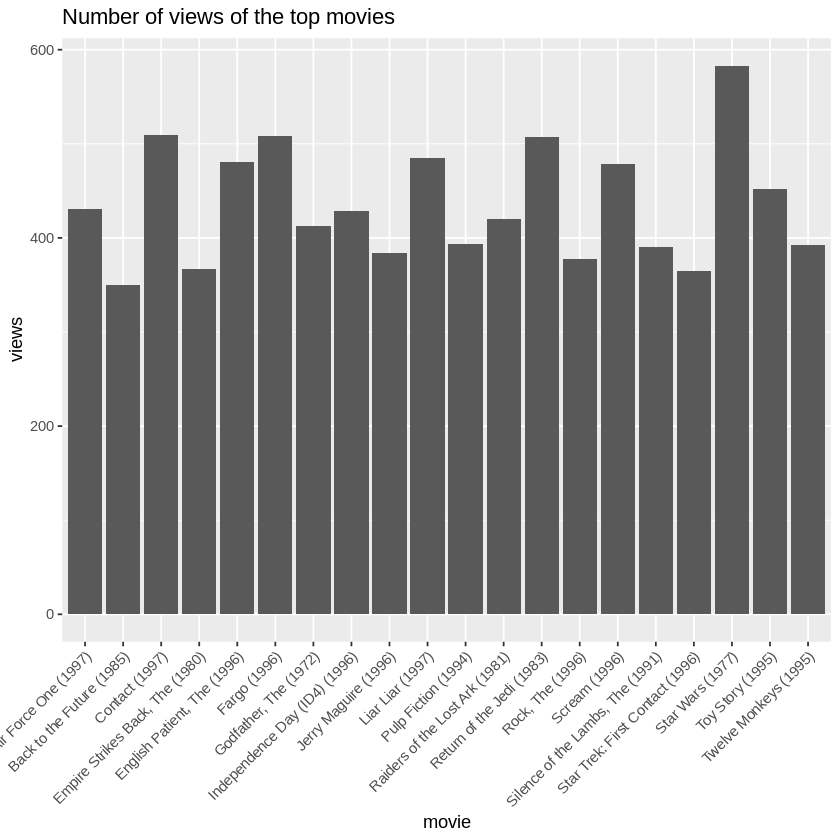

In [ ]:
## insert your code here
plot<-ggplot(table_views[1:20, ], aes(x = movie, y = views)) +
geom_bar(stat="identity") + theme(axis.text.x =
element_text(angle = 45, hjust = 1)) + ggtitle("Number of views of the top movies")
plot

Sometimes when we are plotting an histogram, we want to add some ordering to x-axis. In previous examples, x-axis order is given by movie's name. If we want to order by frequency, the most watched movie the first in x-axis,  this can be achieved in this way.

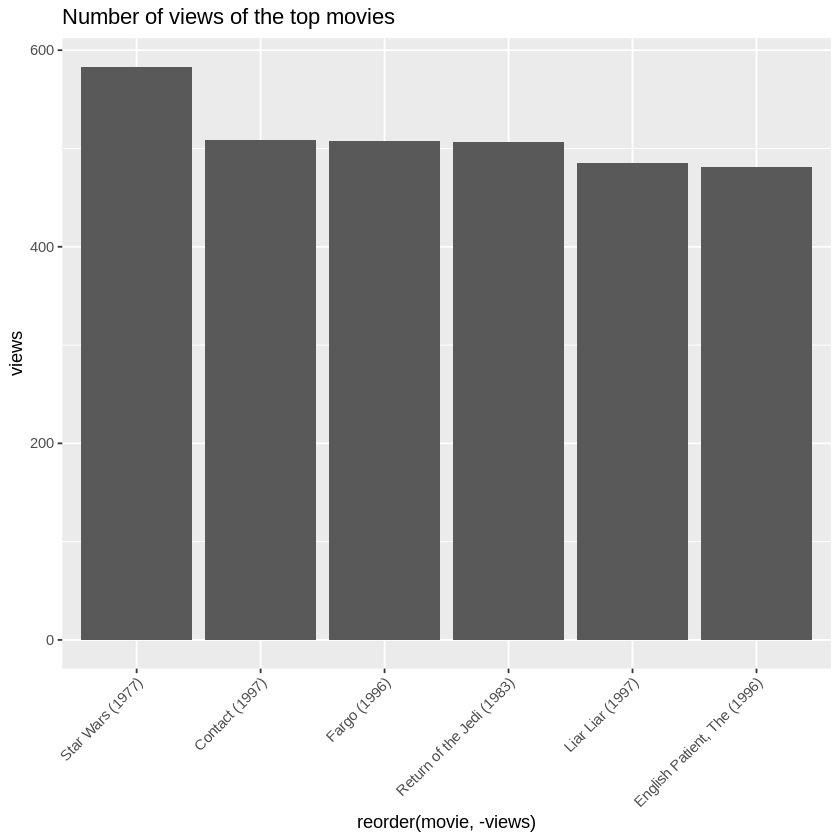

In [ ]:
plot<-ggplot(table_views[1:6, ], aes(x = reorder(movie, -views), y = views)) +
geom_bar(stat="identity") + 
theme(axis.text.x =element_text(angle = 45, hjust = 1)) + 
ggtitle("Number of views of the top movies")
plot

### Exercise 

In previous code we've created an histogram for the top-6 most wathced movies, and ordered the x-axis using the frequency in a descending fashion. Please modify the code below and create an histogram for top-20 most watched movies and using an ascending x-axis ordering.


```
plot<-ggplot(table_views[1:6, ], aes(x = reorder(movie, -views), y = views)) +
geom_bar(stat="identity") + 
theme(axis.text.x =element_text(angle = 45, hjust = 1)) + 
ggtitle("Number of views of the top movies")
plot
```

- hint: reorder(movie, -views) must be modified in order to change ordering criteria from descending to ascending

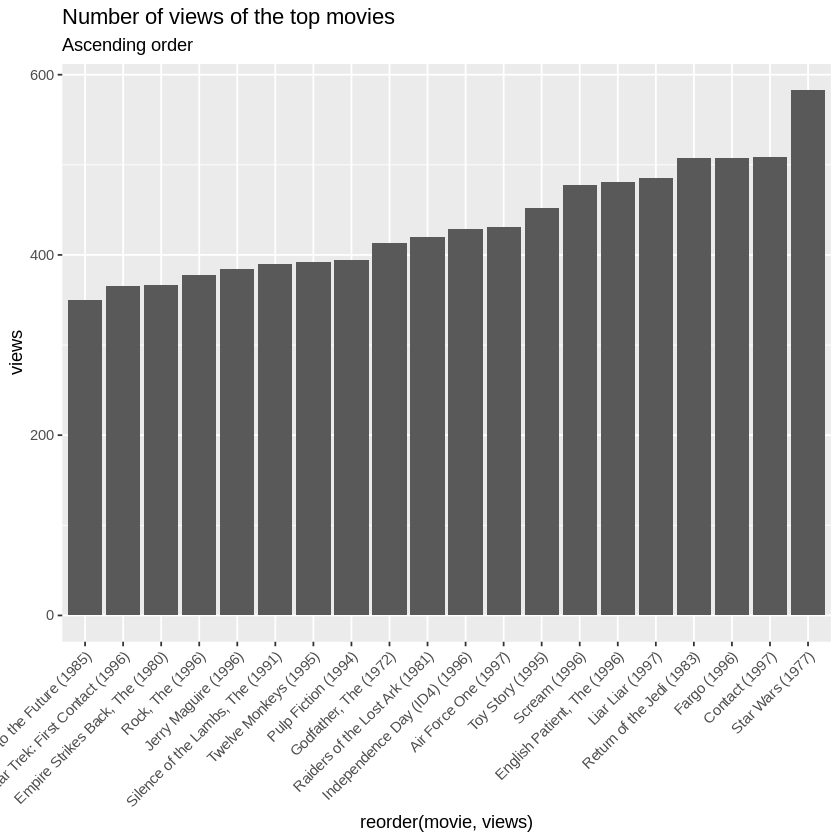

In [ ]:
# insert your code here
plot<-ggplot(table_views[1:20, ], aes(x = reorder(movie, views), y = views)) +
geom_bar(stat="identity") + 
theme(axis.text.x =element_text(angle = 45, hjust = 1)) + 
ggtitle("Number of views of the top movies", "Ascending order")
plot

## Exploring the average ratings per movie
We can identify the top-rated movies by computing the average rating of each of
them. For this purpose, we can use ``colMeans`` method,  0's are automatically ignored since they represent missing values. 

Let's take a look at the distribution of the average movie rating:

*   List item
*   List item



In [ ]:
average_ratings <- colMeans(MovieLense)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



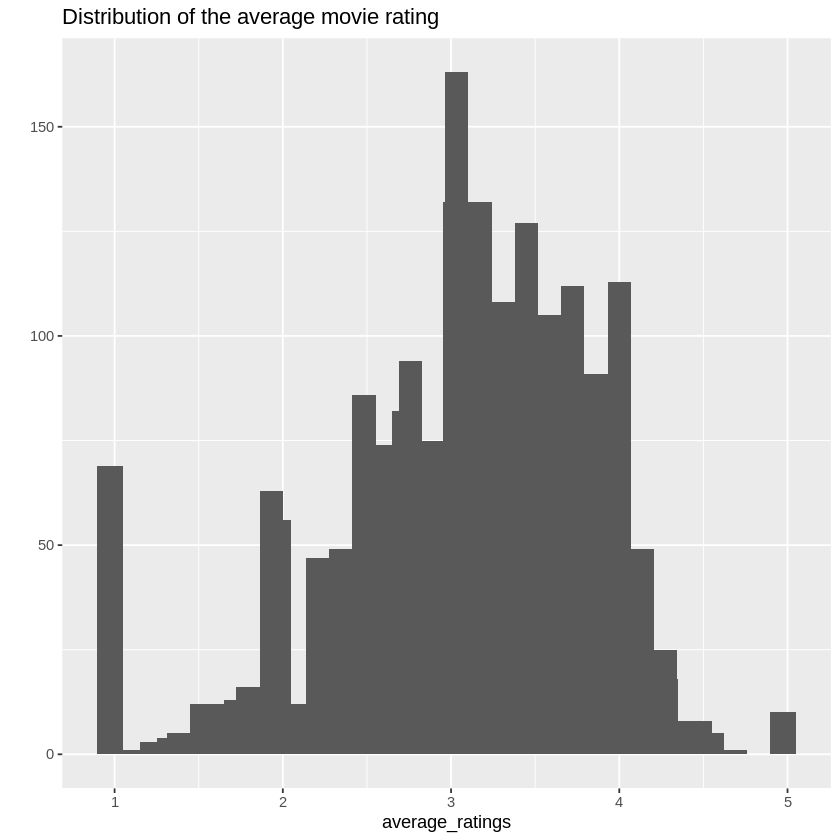

In [ ]:
qplot(average_ratings) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average movie rating")

The highest value is around 3, and there are a few movies whose rating is either 1 or 5. Probably, the reason is that these movies received a rating from a few people only, so we shouldn't take them into account. We can remove the movies whose number of views is below a defined threshold, for instance, below 100

In [ ]:
average_ratings_relevant <- average_ratings[views_per_movie > 100]

### Exercise 
Please use the variable ``average_ratings_relevant``to create an histogram using the following code (make required changes to use the variable ``average_ratings_relevant``)


```
qplot(average_ratings) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average movie rating")
```



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



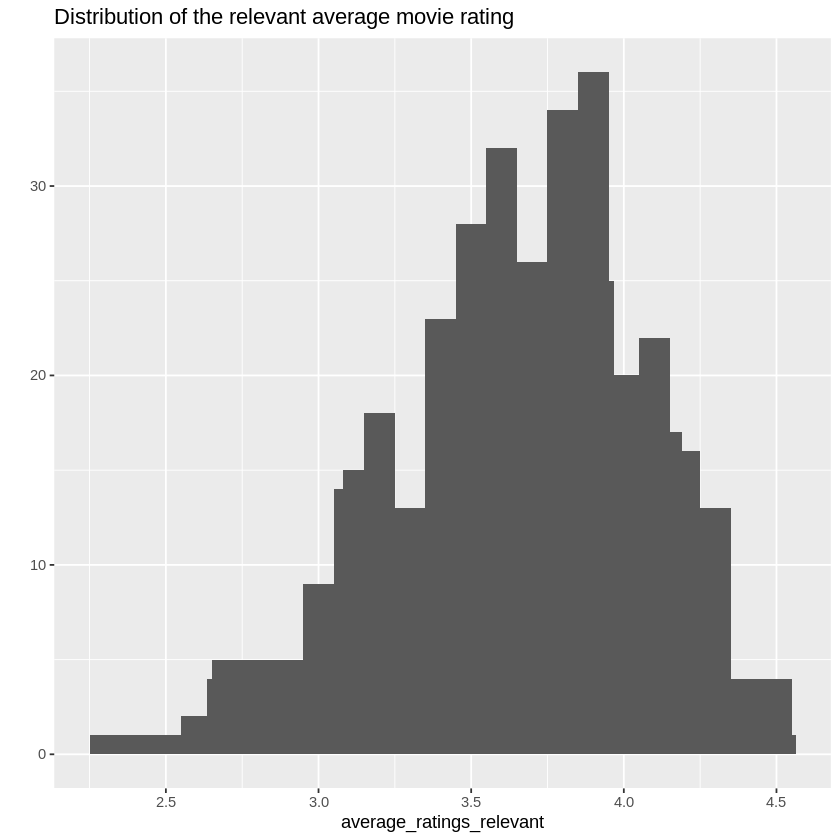

In [ ]:
##insert your code here
qplot(average_ratings_relevant) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the relevant average movie rating")

Rankings are now between 2.2 and 4.6. Now the highest value seems to be around 4. 

### Exercise

Please define a new threshold taking into account only those movies with at least 150 views, then repeat the histogram using the following code 

```
qplot(average_ratings) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average movie rating")
```

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



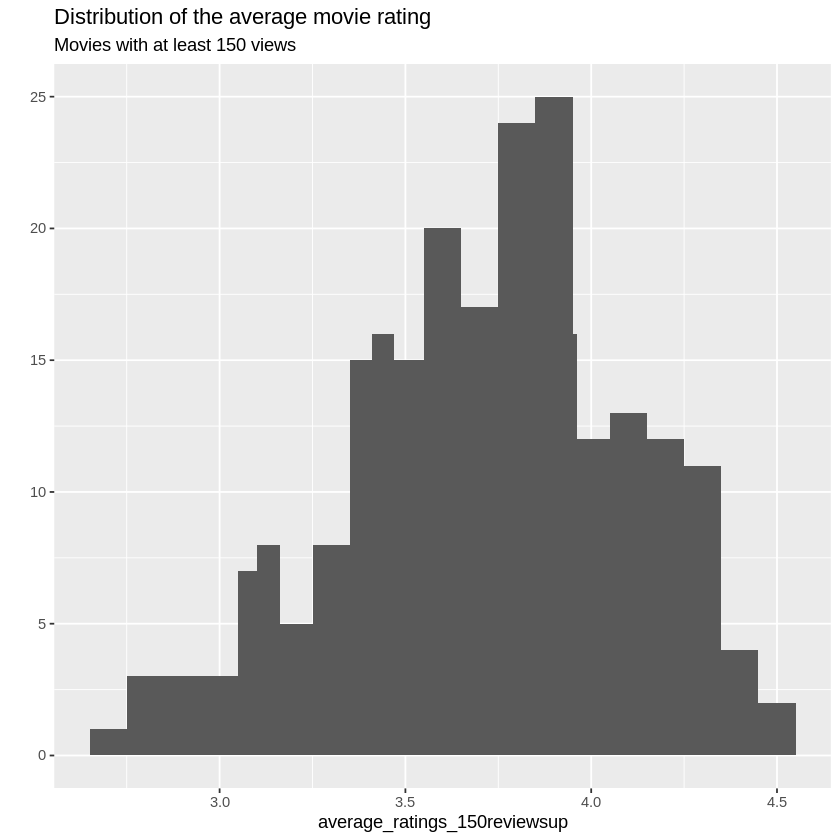

In [ ]:
## insert your code here
average_ratings_150reviewsup <- average_ratings[views_per_movie > 150]
qplot(average_ratings_150reviewsup) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average movie rating", "Movies with at least 150 views")

## Exploring average rating per user

In previous section we explored movie average ratings, in this section we will create an histogram that represent the average rating per user, using ``rowMeans()`` method and a similar code to plot the histogram.

In [ ]:
ratings_movies <- MovieLense

In [ ]:
average_ratings_per_user <- rowMeans(ratings_movies)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



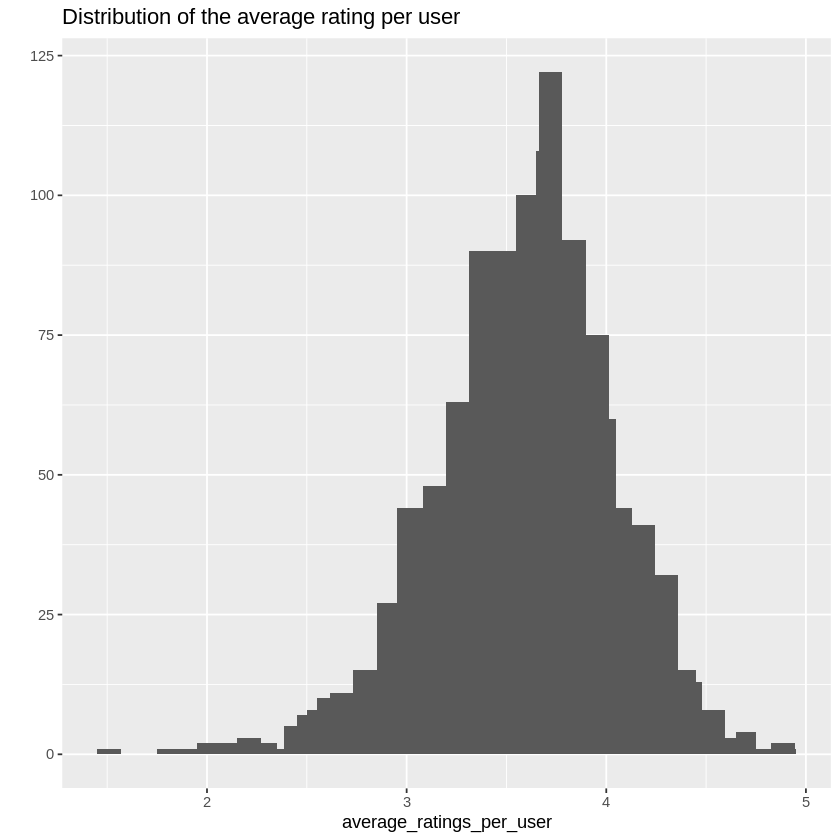

In [ ]:
qplot(average_ratings_per_user) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average rating per user")

### Exercise 

In previous plot we did not filter those user with few ratings, and therefore previous histogram might be misleading. 

Write a code that only consider ratings with following characteristics

- Users who have rated at least 30 movies.
- Movies that have been watched at least 70 times.

Assign it to the variable ``ratings_movies_filtered`` and plot again the histogram using the following code.

```
average_ratings_per_user_filtered <- rowMeans(ratings_movies_filtered)
qplot(average_ratings_per_user_filtered) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average rating per user")
```

**Hint to filter ratings,  use ``rowCounts()`` and ``colCounts()`` methods**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



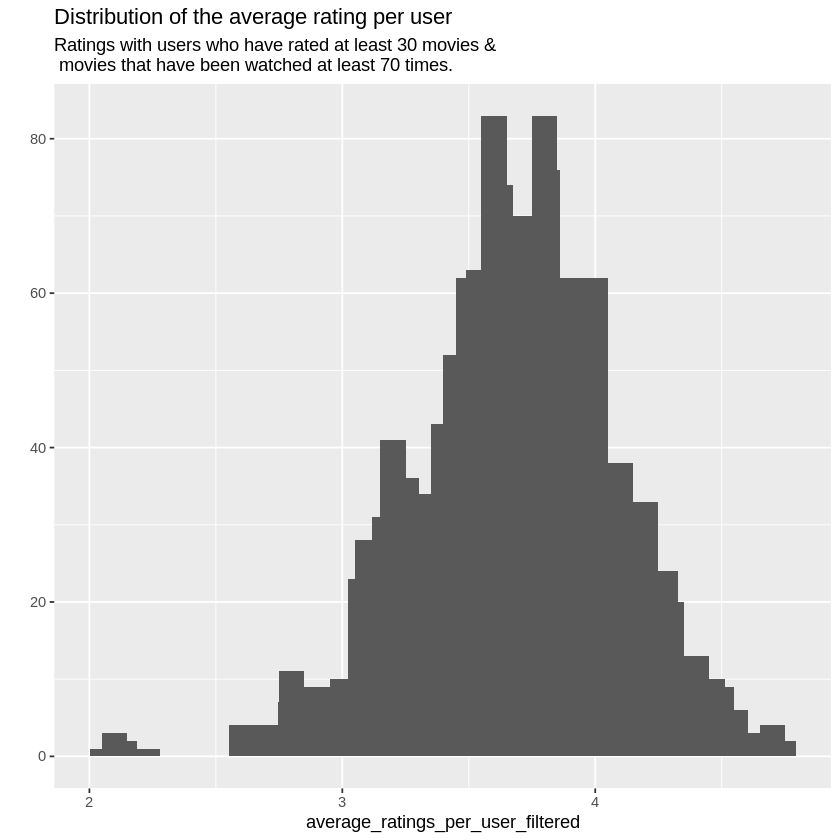

In [ ]:
##insert your code here
ratings_movies_filtered <- MovieLense[rowCounts(MovieLense) >= 30,colCounts(MovieLense) > 70] 
average_ratings_per_user_filtered <- rowMeans(ratings_movies_filtered)
qplot(average_ratings_per_user_filtered) + stat_bin(binwidth = 0.1) +
ggtitle("Distribution of the average rating per user", "Ratings with users who have rated at least 30 movies & \n movies that have been watched at least 70 times.")

## Visualizing rating matrix

We can visualize the matrix by building a heat map whose colors represent the
ratings. Each row of the matrix corresponds to a user, each column to a movie, and each cell to its rating. 

For this purpose, we can use the generic method: ``image``. The recommenderlab package redefined the method image for ``realRatingMatrix`` objects

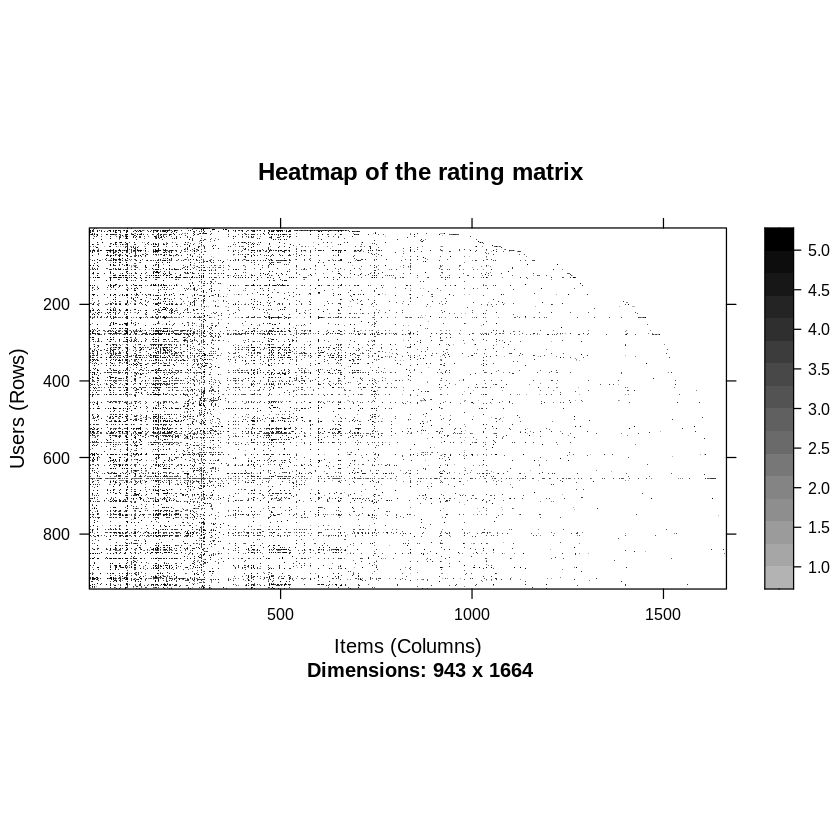

In [ ]:
image(MovieLense, main = "Heatmap of the rating matrix")

We can notice a white area in the top-right region. The reason is that the row and columns are sorted. Since there are too many users and items, this chart is hard to read. We can build another chart zooming in on the first rows and columns.

Let's build the heat map using image:

`image(MovieLense[1:10, 1:15], main = "Heatmap of the first rows and columns")`

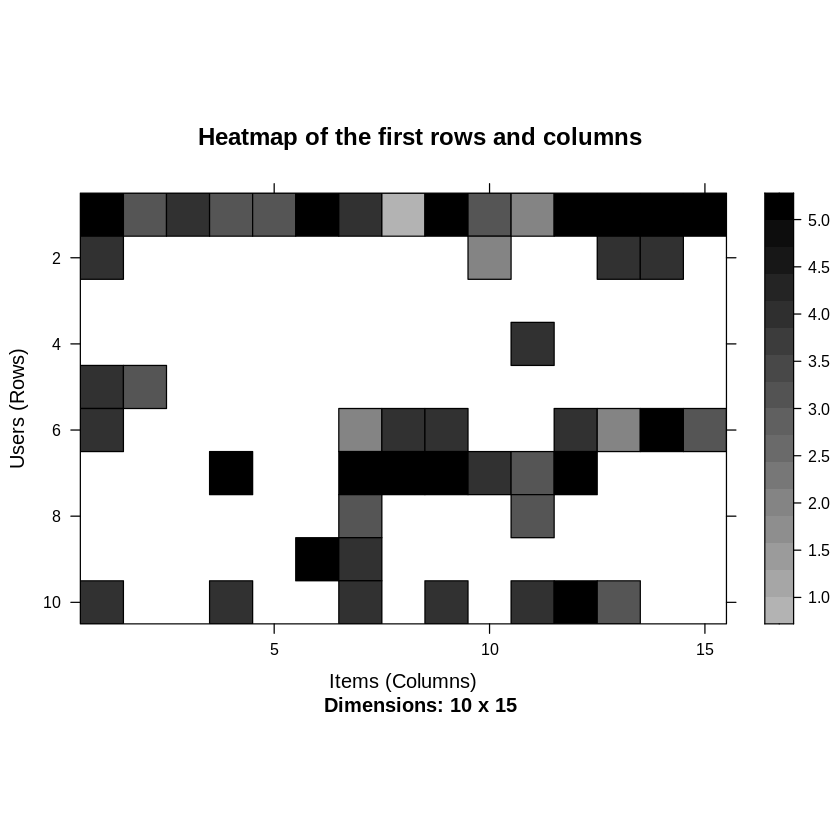

In [ ]:
image(MovieLense[1:10, 1:15], main = "Heatmap of the first rows and columns")

### Exercise

As we discussed in previous section, image method receive ``realRatingMatrix`` as parameter, therefore we can perform filter when required

Explain the following code and plot the results.

```
image(MovieLense[rowCounts(MovieLense) > 400,colCounts(MovieLense) > 430])
```



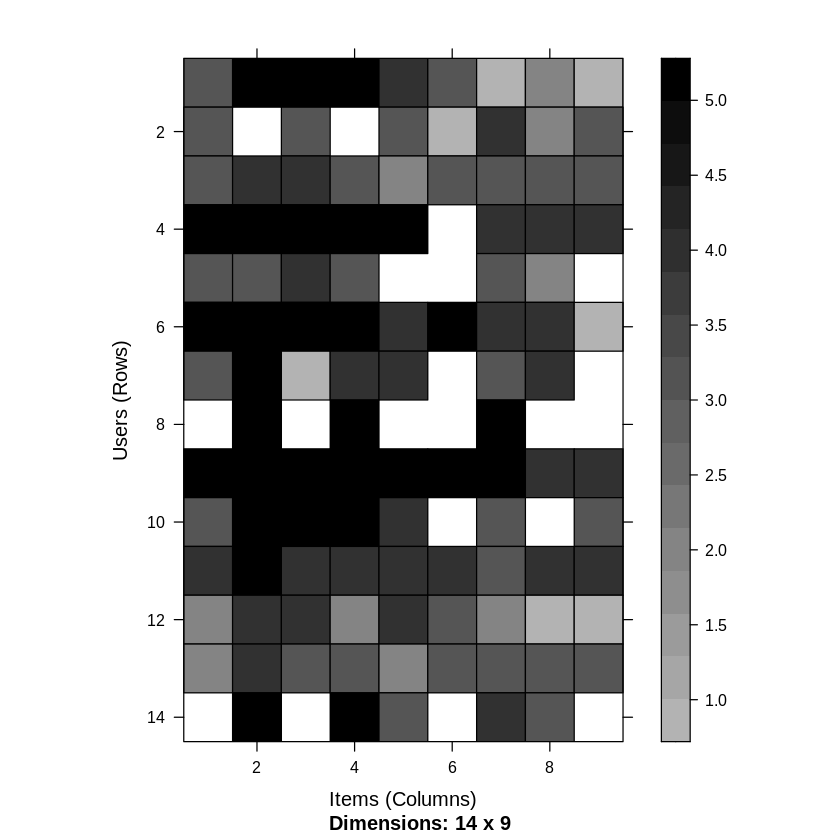

In [ ]:
image(MovieLense[rowCounts(MovieLense) > 400,colCounts(MovieLense) > 430])

We are created a heat map whose colors/cells represent the ratings. Each row of the matrix corresponds to a user  and each column to a movie. We are specifically filtered to see users that have rated more than 400 movies and movies that have been seen by more than 430 userts. 

## Bonus track

Please use this section to add any other analysis that you consider relevant. 


We want to select the most relevant users and items not only from specific rules we apply. We want to see the users that have seen many movies by determining the minimum number of movies per user. And the movies that have been seen by many users by determing the minimum number of users per movie. 

We will also be defining rating_movies to have users that have rated at least 70 movies and movies that have been watched at least 100 times. 

In [ ]:
ratings_movies <- MovieLense[rowCounts(MovieLense) > 70,
colCounts(MovieLense) > 100]
ratings_movies

443 x 332 rating matrix of class ‘realRatingMatrix’ with 50089 ratings.

In [ ]:
min_movies <- quantile(rowCounts(ratings_movies), 0.98)
min_users <- quantile(colCounts(ratings_movies), 0.98)
min_movies
min_users

# we'll be looking at the top 2% of users and movies

98% 
229.64

98% 
306.76

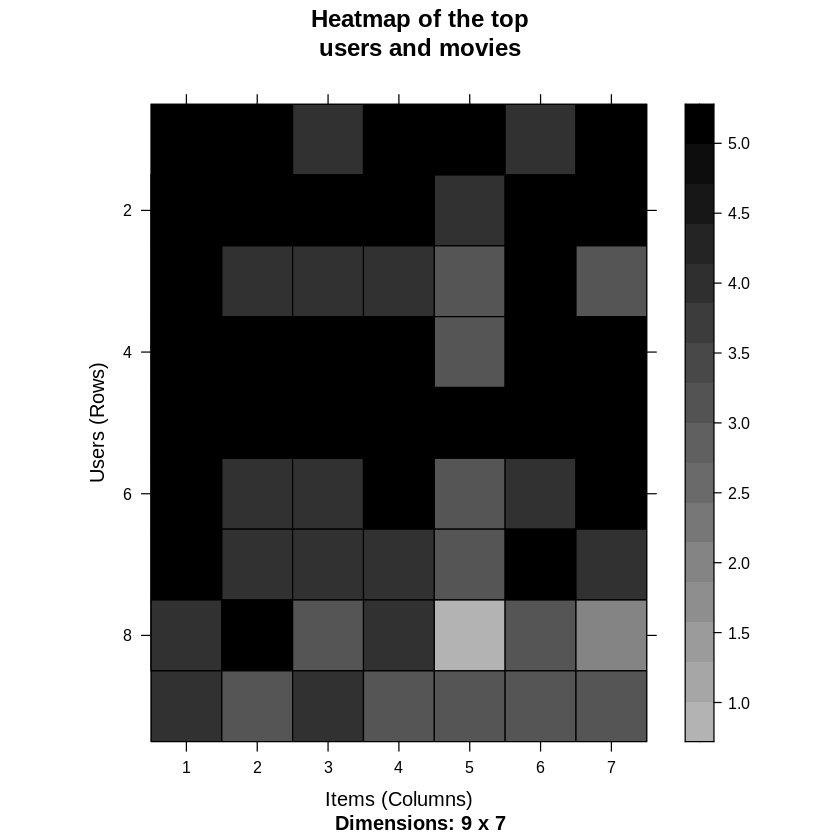

In [ ]:
image(ratings_movies[rowCounts(ratings_movies) > min_movies,
colCounts(ratings_movies) > min_users], main = "Heatmap of the top
users and movies")

If you look at the rows, some users have given good reviews to the a lot of movies. 

Because there are so many dark squares, we should transform the data. Having users who give one sided rewviews creates bias in our analysis. 
We can transform it by normalizing it. This will create a zero average for every user's review. 

In [ ]:
ratings_movies_norm <- normalize(ratings_movies)

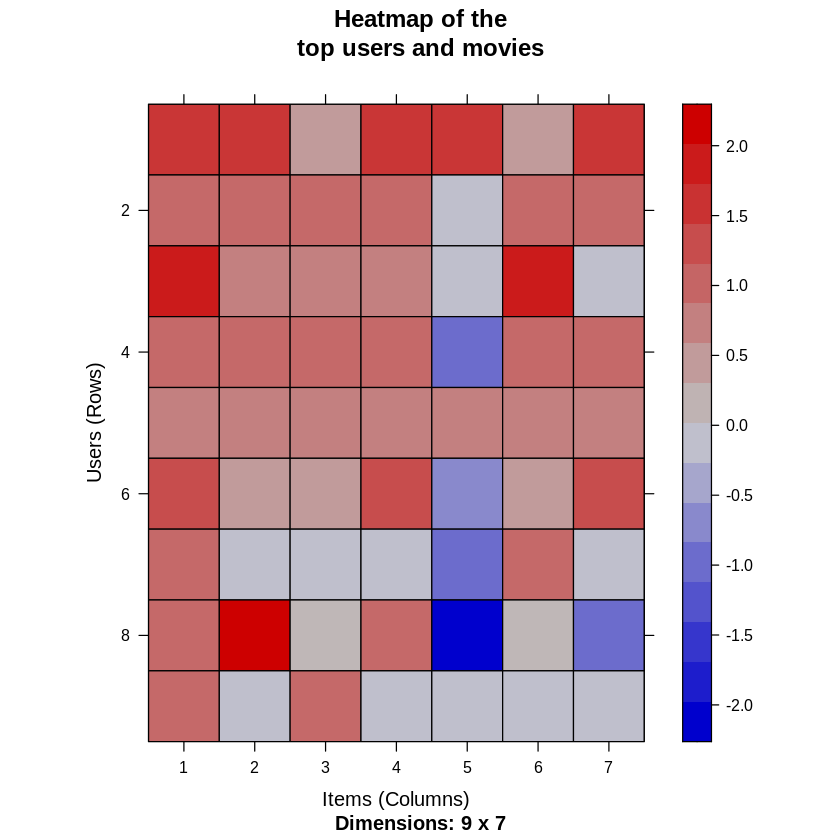

In [ ]:
# visualize the normalized matrix
image(ratings_movies_norm[rowCounts(ratings_movies_norm) > min_movies,
colCounts(ratings_movies_norm) > min_users], main = "Heatmap of the
top users and movies")

We now have data that follows a normal curve. We have a lot of light red, but as a whole we know that the average rating per user is 0, because we normalized the data. 

In [ ]:
recommender_models <- recommenderRegistry$get_entries(dataType =
"realRatingMatrix")
recommender_models$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE